### 1. Import thư viện

### Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

### 2. Nạp dữ liệu, phân tích & loại bỏ features không liên quan

In [ ]:
import pandas as pd # Cần import thư viện

df = pd.read_csv('dataset/train.csv')  # Load dữ liệu train

# Xem dữ liệu
print(df.head())
print(df.info())
print(df.describe())

# Danh sách các cột không cần thiết
items_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# Lọc ra các cột còn lại để làm features
features_response = [col for col in df.columns if col not in items_to_remove + ['Survived']]
print("Features còn lại:", features_response)

# Điền giá trị thiếu
# KHẮC PHỤC CẢNH BÁO: Thay thế inplace=True bằng cách gán trực tiếp để tránh lỗi "Chained Assignment"
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Mã hóa biến phân loại
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### 3. Chuẩn bị dữ liệu cho train và test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response].values,
    df['Survived'].values,
    test_size=0.2,
    random_state=24
)

### 4. Xây dựng Decision Tree

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=24)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=24)

### 5. Hiển thị cây quyết định

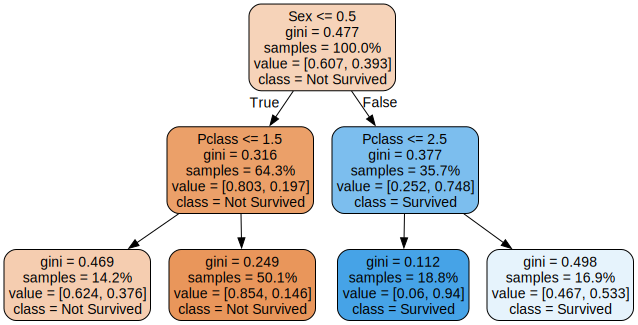

In [ ]:
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=features_response,
    proportion=True,
    class_names=['Not Survived', 'Survived']
)
graph = graphviz.Source(dot_data)
graph  # Hiển thị trực tiếp trong Jupyter

## 🧩 Kết luận từ mô hình Cây Quyết Định (Decision Tree)

Sau khi huấn luyện mô hình cây quyết định với độ sâu tối đa là **2**, kết quả trực quan cho thấy:

- **Biến quan trọng nhất** ảnh hưởng đến khả năng sống sót là **giới tính (`Sex`)**.  
- **Biến thứ hai** có ảnh hưởng rõ rệt là **hạng vé (`Pclass`)**.

### 🔹 Phân tích chi tiết
1. **Giới tính:**
   - Nam giới (Sex = 0) có tỷ lệ tử vong cao hơn đáng kể.  
   - Nữ giới (Sex = 1) có khả năng sống sót cao hơn, đặc biệt khi ở hạng vé cao.

2. **Hạng vé (Pclass):**
   - Nam ở **hạng 2–3**: phần lớn **không sống sót** (~85%).  
   - Nam ở **hạng 1**: tỷ lệ sống thấp hơn trung bình (~38%).  
   - Nữ ở **hạng 1–2**: **gần như chắc chắn sống sót** (~94%).  
   - Nữ ở **hạng 3**: tỷ lệ sống và chết **gần cân bằng** (~53%).

### 📊 Bảng tổng hợp

| Giới tính | Hạng vé | Xác suất sống | Nhận xét |
|------------|----------|----------------|-----------|
| Nam | 1 | ≈ 37.6% | Có cơ hội, nhưng thấp |
| Nam | 2–3 | ≈ 14.6% | Hầu như không sống |
| Nữ | 1–2 | ≈ 94% | Gần như chắc chắn sống |
| Nữ | 3 | ≈ 53% | Cân bằng, sống nhỉnh hơn |

### 💡 Kết luận tổng thể
- Cây quyết định phản ánh rõ quy luật **“Ladies first”** trong thảm họa Titanic.  
- Hai yếu tố **giới tính** và **hạng vé** đóng vai trò then chốt trong khả năng sống sót.  
- Mặc dù chỉ với độ sâu = 2, mô hình vẫn cho kết quả **dễ hiểu, trực quan và phù hợp với thực tế**.  
- Đây là minh chứng cho khả năng **diễn giải trực quan** của mô hình **Decision Tree** trong phân tích dữ liệu.


### Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

### Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [ ]:
# 1. Định nghĩa lưới tham số: Kiểm tra n_estimators từ 10 đến 100 (bước 10)
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

# 2. Khởi tạo Grid Search
cv_rf_ex = GridSearchCV(
    estimator=rf,                   # Mô hình: Random Forest.
    param_grid=rf_params_ex,        # Lưới tham số cần tối ưu.
    scoring='roc_auc',              # Tiêu chí đánh giá: ROC AUC.
    n_jobs=-1,                      # SỬ DỤNG TẤT CẢ CPU CORES để tăng tốc.
    refit=True,                     # Huấn luyện lại mô hình tốt nhất sau khi tìm kiếm.
    cv=4,                           # Kiểm tra chéo 4 lần (4-fold cross-validation).
    verbose=1,                      # Hiển thị thông tin tiến trình.
    error_score=np.nan,             # Xử lý lỗi: Gán NaN nếu có lỗi xảy ra.
    return_train_score=True         # Trả về điểm huấn luyện để kiểm tra overfitting.
)

# 3. Tiến hành tìm kiếm và huấn luyện
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

### Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

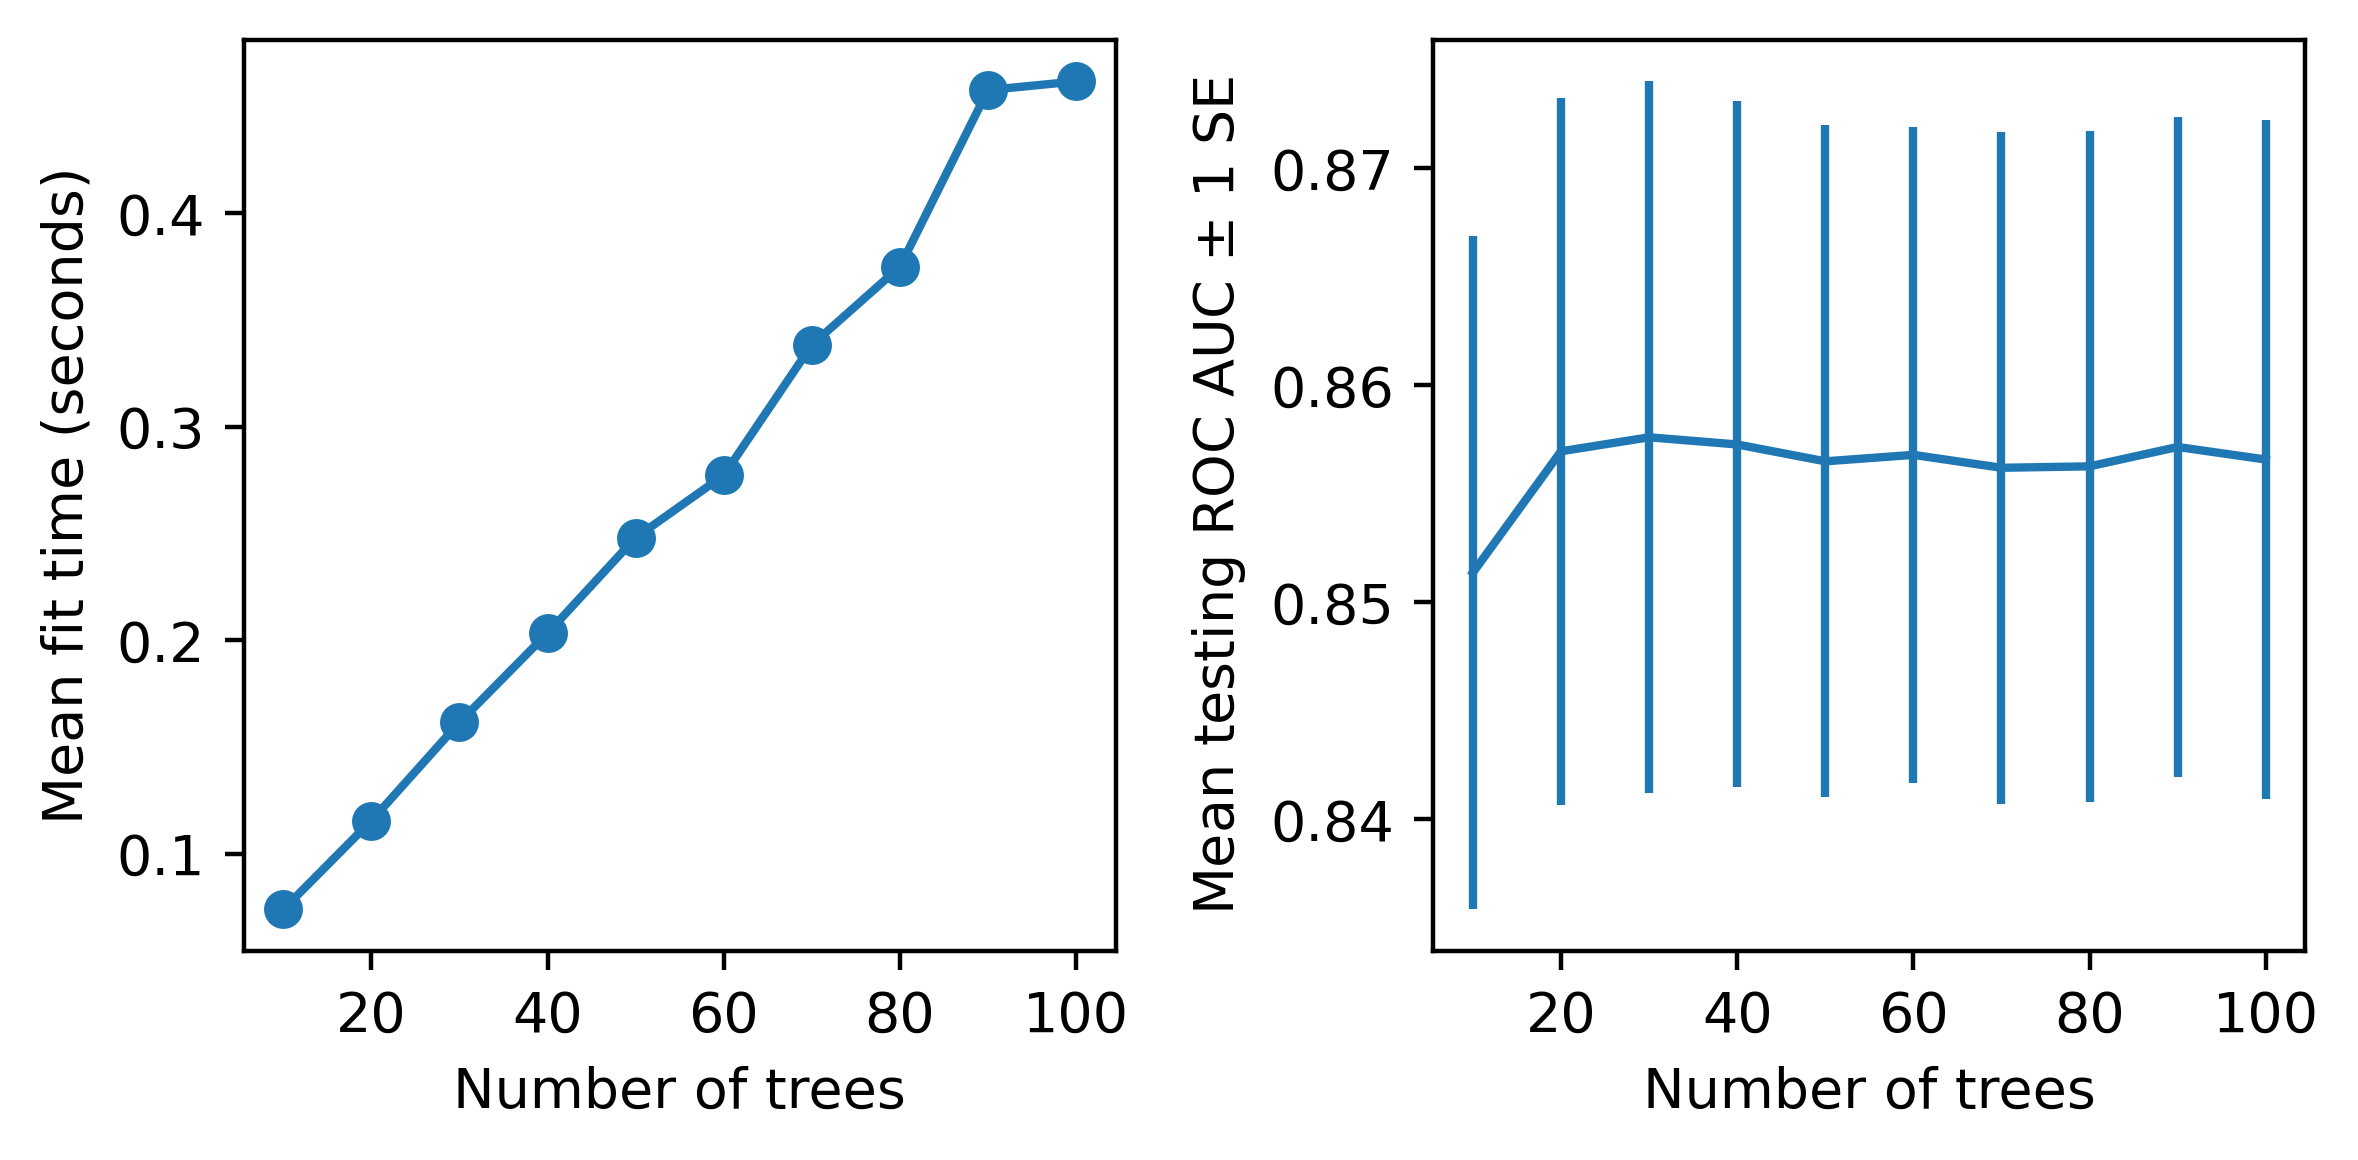

In [ ]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

# Biểu đồ 1: Thời gian huấn luyện
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

# Biểu đồ 2: Hiệu suất kiểm tra (validation)
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE')

plt.tight_layout()

## Nhận xét 2 biểu đồ đánh giá Random Forest theo `n_estimators`

---

### **Biểu đồ 1: Thời gian huấn luyện (Mean fit time)**  
**Nhận xét**:  
- Thời gian huấn luyện **tăng gần tuyến tính** theo số lượng cây.  
- Từ 10 đến 100 cây, thời gian tăng **khoảng 4–5 lần** (từ ~0.1s → ~0.45s).  
- **Không có dấu hiệu bão hòa** → chi phí tính toán tăng đều đặn.

---

### **Biểu đồ 2: Hiệu suất kiểm tra (Mean testing ROC AUC ± 1 SE)**  
**Nhận xét**:  
- Hiệu suất **tăng mạnh** từ 10 → ~30 cây, đạt đỉnh **~0.86**.  
- Từ **40 cây trở đi**, ROC AUC **ổn định**, dao động rất nhỏ.  
- **Thanh lỗi (SE) nhỏ** → kết quả đáng tin cậy, ít biến động giữa các fold.

---

**Kết luận ngắn gọn**:  
**Chỉ cần 30–40 cây** là đủ để đạt hiệu suất tối ưu (~0.86), **thêm cây chỉ tăng thời gian mà không cải thiện hiệu suất**.